## Altmap Experiments
### Compare altmap to map eq using networkx


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator)
import numpy as np

# show plots in separate window
%pylab
# load helpers and wrappers
%run helpers.py 


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [6]:
epsilon = 0.15
N1 = 200
N2 = 50
N = N1 + N2
p_self = (1.0 - epsilon) / (N/2 - 1)
p_ext = 2.0 *  epsilon / N

# generate graph
G = nx.MultiGraph()
G.add_nodes_from(range(1, N+1))
for n1 in range(1, N1+1):
    for i in range(n1 + 1, N1+1):
        G.add_edge(n1, i, weight=p_self)
    
    for n2 in range(N1+1, N1+N2+1):
        G.add_edge(n1, n2, weight=p_ext)

for n2 in range(N1+1, N1+N2+1):
    for i in range(n2 + 1, N1+N2+1):
        G.add_edge(n2, i, weight=p_self)

# 2 communities
nodes_ids = list(range(1, N+1))
labels = [1] * N1 + [2] * N2
communities = dict(zip(nodes_ids, labels))

cost = altmap_cost(G, communities)
print (f'Ground Truth 2 communities L = {cost}')
print (f'Analytical: {-1.0 - plogp(1.0-epsilon) - plogp(epsilon)}\n')

# each node a community
communities = dict(zip(nodes_ids, nodes_ids))

cost = altmap_cost(G, communities)
print (f'Ground Truth each node L = {cost}')
print (f'Analytical: {-np.log2(N/(N - 1))}\n')


Ground Truth 2 communities L = -0.13539149546531298
Analytical: -0.3901596952835996

Ground Truth each node L = -0.0061238916369101
Analytical: -0.005782352594006178



In [11]:
# run community detection
# communities_found, num_communities_found = infomap(G, altmap=False)
# communities_found, num_communities_found = infomap(G, altmap=True)
communities_found, num_communities_found = infomap(G, altmap=True, init='sc')

# print results
print (communities_found)
print (f'We found {num_communities_found} communities.')

# cost = altmap_cost(G, communities_found)
# print (f'Achieved cost L = {cost}')


OrderedDict([(1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110,

/home/chri/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


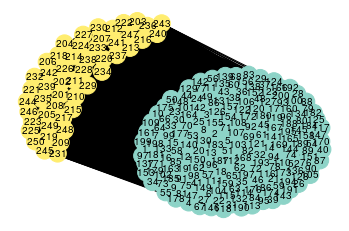

In [12]:
plt.close('all')
plt.figure()
drawNetwork(G, communities_found)